# 以$N_2$分子解离为例
我们采用最小基(sto-3g)基组，对$N_2$分子的解离过程，使用HF,MP2, CCSD, FCI分别进行计算。通过这个例子解释关联能，强关联，弱关联等概念。

In [1]:
import numpy as np
from pyscf import gto, scf, mp, cc, fci

def geometry_n2(dist = 1.0):
    geometry = [("N",(0,0,0)),("N",(0,0,dist))]
    return geometry

dist_list = np.arange(0.6,3.01,0.05)

e_hf = []
e_mp2 = []
e_ccsd = []
e_fci = []
fci_vec = []
for d in dist_list:
    mol = gto.Mole()
    mol.atom = geometry_n2(dist = d)
    mol.basis = "sto-3g"
    mol.build()

    mf = scf.RHF(mol)
    mf.verbose = 0
    mf.run()
    e_hf.append(mf.e_tot)

    mymp = mp.MP2(mf)
    mymp.verbose = 0
    mymp.kernel()
    e_mp2.append(mymp.e_tot)

    mycc = cc.CCSD(mf)
    mycc.verbose = 0
    mycc.max_cycle = 50
    mycc.kernel()
    if not mycc.converged:
        print(f"CCSD for dist {d:.3} does not converge")
    e_ccsd.append(mycc.e_tot)

    myci = fci.FCI(mf)
    myci.verbose = 0
    e, vec = myci.kernel()
    e_fci.append(e)
    fci_vec.append(vec)

CCSD for dist 2.1 does not converge
CCSD for dist 2.15 does not converge
CCSD for dist 2.2 does not converge
CCSD for dist 2.25 does not converge
CCSD for dist 2.3 does not converge
CCSD for dist 2.35 does not converge
CCSD for dist 2.4 does not converge
CCSD for dist 2.45 does not converge
CCSD for dist 2.5 does not converge
CCSD for dist 2.55 does not converge
CCSD for dist 2.6 does not converge
CCSD for dist 2.65 does not converge
CCSD for dist 2.7 does not converge
CCSD for dist 2.75 does not converge
CCSD for dist 2.8 does not converge
CCSD for dist 2.85 does not converge
CCSD for dist 2.9 does not converge
CCSD for dist 2.95 does not converge
CCSD for dist 3.0 does not converge


In [2]:
e_hf = np.array(e_hf)
e_mp2 = np.array(e_mp2)
e_ccsd = np.array(e_ccsd)
e_fci = np.array(e_fci)
fci_vec = np.array(fci_vec)

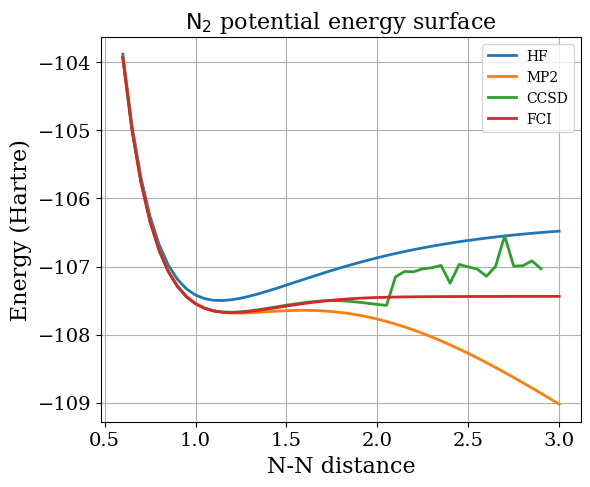

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font',family='serif')
fsize1=20
fsize2=18
fsize3=16
labelsize = 14
fontsize = 16

plt.figure(figsize=(6,5))
plt.grid(which='major', axis='both', )
plt.subplots_adjust(left = 0.15,right = 0.95)
plt.title('$\mathrm{N_2}$ potential energy surface',fontsize=fontsize)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.ylabel('Energy (Hartre)', fontsize=fontsize)
plt.xlabel('N-N distance', fontsize=fontsize)


plt.plot(dist_list, e_hf,'-',linewidth =2,label = "HF")
plt.plot(dist_list, e_mp2,'-',linewidth =2,label = "MP2")
plt.plot(dist_list, e_ccsd,'-',linewidth =2,label = "CCSD")
plt.plot(dist_list, e_fci,'-',linewidth =2,label = "FCI")
plt.legend()

plt.show()

可以进一步计算出关联能

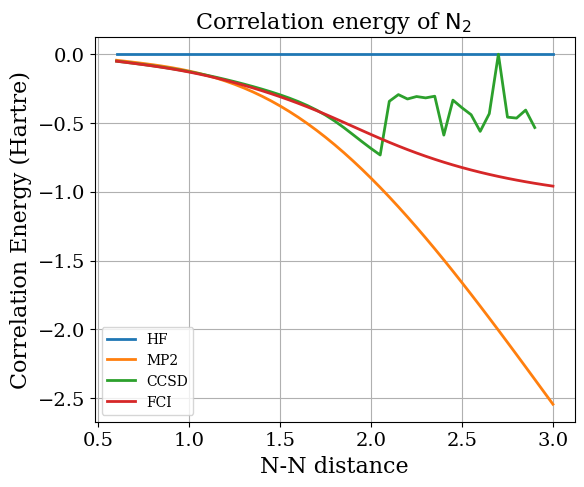

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('font',family='serif')
fsize1=20
fsize2=18
fsize3=16
labelsize = 14
fontsize = 16

plt.figure(figsize=(6,5))
plt.grid(which='major', axis='both', )
plt.subplots_adjust(left = 0.15,right = 0.95)
plt.title('Correlation energy of $\mathrm{N_2}$ ',fontsize=fontsize)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.ylabel('Correlation Energy (Hartre)', fontsize=fontsize)
plt.xlabel('N-N distance', fontsize=fontsize)


plt.plot(dist_list, e_hf-e_hf,'-',linewidth =2,label = "HF")
plt.plot(dist_list, e_mp2-e_hf,'-',linewidth =2,label = "MP2")
plt.plot(dist_list, e_ccsd-e_hf,'-',linewidth =2,label = "CCSD")
plt.plot(dist_list, e_fci-e_hf,'-',linewidth =2,label = "FCI")
plt.legend()

plt.show()

上面我们对键长从0.6到3.0不等的$N_2$分子的能量和关联能用HF, MP2, CCSD, FCI四种方法分别进行了计算并作图。不难得出以下结论：
- 当键长较小时，四种方法算得的能量相近，MP2和CCSD算得的关联能与FCI方法相近
- MP2和CCSD是非变分的，算出的关联能可能比FCI方法得到的关联能更低
- 随着键长变大，MP2和CCSD方法算的关联能逐渐偏离FCI放啊算的关联能。大到一定程度以后MP2方法会算出非常离谱的关联能，而CCSD方法无法收敛。

在键长较小时的$N_2$分子属于弱关联体系，键长较大时$N_2$分子属于强关联体系。由此可以对强关联体系和弱关联体系有一个大致的认识：

弱关联体系的特点：
- 关联能不大
- 单个slater行列式就可以很好得近似
- 单参考态方法和多参考态方法都可以算出较准确得关联能

强关联体系的特点：
- 关联能较大
- 单个slater行列式无法很好近似
- 多数单参考态方法逐渐失效

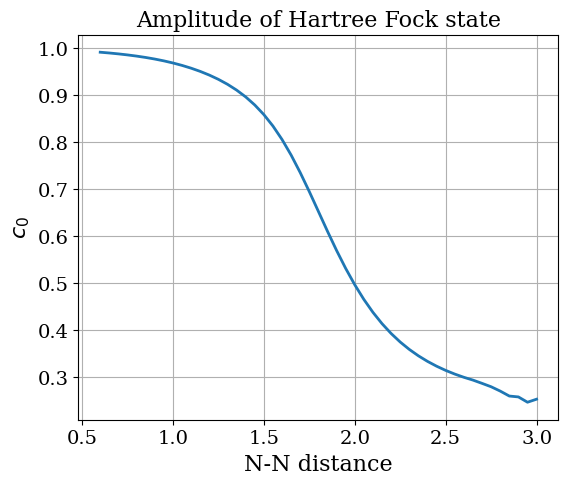

In [5]:
fci_vec = np.array(fci_vec)
hf_amp = fci_vec[:,0,0]

plt.figure(figsize=(6,5))
plt.grid(which='major', axis='both', )
plt.subplots_adjust(left = 0.15,right = 0.95)
plt.title('Amplitude of Hartree Fock state',fontsize=fontsize)
plt.xticks(fontsize=labelsize)
plt.yticks(fontsize=labelsize)
plt.ylabel('$c_0$', fontsize=fontsize)
plt.xlabel('N-N distance', fontsize=fontsize)
plt.plot(dist_list, abs(hf_amp) ,'-',linewidth =2)

plt.show()



上图绘制了不同键长时FCI波函数：
$$
\begin{aligned}
\left|\Phi_0\right\rangle=c_0\left|\Psi_0\right\rangle+ & \sum_{a r} c_a^r\left|\Psi_a^r\right\rangle+\sum_{\substack{a<b \\
r<s}} c_{a b}^{r s}\left|\Psi_{a b}^{r s}\right\rangle+\sum_{\substack{a<b<c \\
r<s<t}} c_{a b c}^{r s t}\left|\Psi_{a b c}^{r s t}\right\rangle+ \\
& \sum_{\substack{a<b<c<d \\
r<s<t<u}} c_{a b c d}^{r s t u}\left|\Psi_{a b c d}^{r s t u}\right\rangle+\cdots
\end{aligned}
$$
中HF态的系数，也就是$c_0$的变化，可见当键长增大时，FCI波函数中HF态的系数逐渐变小。